<a href="https://colab.research.google.com/github/rofiahadeshina/QuickStart2020/blob/master/week3_interimipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()


Saving Week2_challenge_data_source.xlsx to Week2_challenge_data_source.xlsx


In [3]:
import io
df2 = pd.read_excel(io.BytesIO(uploaded['Week2_challenge_data_source.xlsx']))

In [56]:
df2.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),total_social,total DL_UL data,total_netflix,total_email,total_gaming,total_google,total_youtube
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,42.0,5.0,23.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,37624.0,38787.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,NaN,NaN,NaN,NaN,NaN,NaN,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0,1570185.0,345629377.0,17855187.0,3701304.0,292426453.0,2905912.0,18355943.0
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.0,5.0,16.0,26.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,168.0,3560.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),NaN,NaN,NaN,NaN,NaN,NaN,971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0,1933278.0,707185356.0,35565545.0,937385.0,609920783.0,4414096.0,39359124.0
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.361763e+09,Samsung,Samsung Galaxy A8 (2018),NaN,NaN,NaN,NaN,NaN,NaN,751.0,695.0,1684053.0,42224.0,8535055.0,1694064.0,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0,1726277.0,307690973.0,23751202.0,3363124.0,229980251.0,10229119.0,34425237.0
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,NaN,NaN,44.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,3330.0,37882.0,1.321510e+09,undefined,undefined,NaN,NaN,NaN,NaN,NaN,NaN,17.0,207.0,644121.0,13372.0,9023734.0,2788027.0,1439754.0,631229.0,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0,657493.0,889352748.0,15092588.0,2070983.0,810387875.0,11811761.0,36534765.0
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.089009e+09,Samsung,Samsung Sm-G390F,NaN,NaN,NaN,NaN,NaN,NaN,607.0,604.0,862600.0,50188.0,6248284.0,1500559.0,1936496.0,173853.0,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0,912788.0,607681403.0,17539799.0,2110349.0,531237049.0,7748843.0,34222253.0


In [98]:
df2.shape

(150001, 62)

In [99]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 62 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   Bearer Id                                 150001 non-null  object        
 1   Start                                     150000 non-null  datetime64[ns]
 2   Start ms                                  150000 non-null  float64       
 3   End                                       150000 non-null  datetime64[ns]
 4   End ms                                    150000 non-null  float64       
 5   Dur. (ms)                                 150000 non-null  float64       
 6   IMSI                                      149431 non-null  float64       
 7   MSISDN/Number                             150001 non-null  float64       
 8   IMEI                                      149429 non-null  float64       
 9   Last Location N

In [100]:
df2.dtypes

Bearer Id                object
Start            datetime64[ns]
Start ms                float64
End              datetime64[ns]
End ms                  float64
                      ...      
total_netflix           float64
total_email             float64
total_gaming            float64
total_google            float64
total_youtube           float64
Length: 62, dtype: object

In [112]:
df2["Handset Manufacturer"].value_counts()

Apple                                            59565
Samsung                                          40839
Huawei                                           34423
undefined                                         8987
Sony Mobile Communications Ab                      980
                                                 ...  
Shenzhen Sprocomm Technologies Co Ltd                1
Adar                                                 1
Shenzhen City Ramos Digital Technology Co Ltd        1
Shenzhen New Chabridge Communication Co Ltd          1
Shenzhen Jsr Technology Co Ltd                       1
Name: Handset Manufacturer, Length: 170, dtype: int64

In [113]:
df2["Handset Type"].value_counts()

Huawei B528S-23A                           19752
Apple iPhone 6S (A1688)                     9419
Apple iPhone 6 (A1586)                      9023
undefined                                   8987
Apple iPhone 7 (A1778)                      6326
                                           ...  
Gemalto M2M Gmbh Cinterion Ehs5-E              1
Tct Mobile Suzho. Alcatel One Touch 997        1
Shenzhen Sprocom. Fly Iq4490                   1
Sony Mobile Comm. Sony C5303 -Xperia Sp        1
Htc 2Q6E100                                    1
Name: Handset Type, Length: 1396, dtype: int64

In [14]:
df2["MSISDN/Number"].fillna(df2["MSISDN/Number"].mean(), inplace=True)

In [72]:
df2["Avg RTT DL (ms)"].fillna(df2["Avg RTT DL (ms)"].median(), inplace=True)
df2['Avg RTT UL (ms)'].fillna(df2['Avg RTT UL (ms)'].median(), inplace=True)
df2['Avg Bearer TP UL (kbps)'].fillna(df2['Avg Bearer TP UL (kbps)'].median(), inplace=True)
df2['Avg Bearer TP DL (kbps)'].fillna(df2['Avg Bearer TP DL (kbps)'].median(), inplace=True)

In [73]:
#Task 1.1
#Number of xDR session
Number_of_xDR_session = df2.groupby(["MSISDN/Number"]).agg({'Bearer Id':'count'})
print(Number_of_xDR_session)


               Bearer Id
MSISDN/Number           
3.360100e+10           1
3.360100e+10           1
3.360100e+10           1
3.360101e+10           1
3.360101e+10           2
...                  ...
3.379000e+10           1
4.188282e+10        1066
3.197021e+12           1
3.370000e+14           1
8.823971e+14           1

[106857 rows x 1 columns]


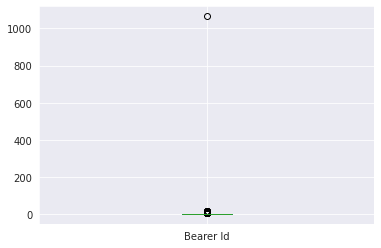

In [114]:
#
Number_of_xDR_session.boxplot()

In [103]:
#session duration
df2["Dur. (ms).1"].fillna(df2["Dur. (ms).1"].mean(), inplace=True)
df2['Dur. (ms).1'].isnull().sum()
session_duration = df2.groupby(["MSISDN/Number"]).agg({'Dur. (ms).1':'sum'})
print(session_duration)

                Dur. (ms).1
MSISDN/Number              
3.360100e+10   1.167201e+08
3.360100e+10   1.812310e+08
3.360100e+10   1.349694e+08
3.360101e+10   4.987802e+07
3.360101e+10   3.710445e+07
...                     ...
3.379000e+10   1.409887e+08
4.188282e+10   7.255155e+10
3.197021e+12   8.773853e+08
3.370000e+14   2.530302e+08
8.823971e+14   8.698442e+08

[106857 rows x 1 columns]


In [41]:
df2['total DL_UL data'] = df2['Total UL (Bytes)']+df2["Total DL (Bytes)"]


In [42]:
df2["total_social"]=df2["Social Media DL (Bytes)"]+df2["Social Media UL (Bytes)"]
df2["total_netflix"]=df2['Netflix DL (Bytes)']+df2['Netflix UL (Bytes)']
df2["total_email"]=df2['Email DL (Bytes)']+df2['Email UL (Bytes)']
df2['total_gaming']=df2['Gaming DL (Bytes)']+df2['Gaming UL (Bytes)']
df2['total_google']=df2['Google DL (Bytes)']+df2['Google UL (Bytes)']
df2['total_youtube']=df2['Youtube DL (Bytes)']+df2['Youtube UL (Bytes)']

In [83]:
d_f=df2.pivot_table(index="MSISDN/Number", values=['total_gaming','total_google','total_youtube','total_social','total_email','total_netflix','total DL_UL data'], aggfunc='sum')
print(d_f)

               total DL_UL data   total_email  ...  total_social  total_youtube
MSISDN/Number                                  ...                             
3.360100e+10       8.786906e+08  1.331362e+06  ...  2.232135e+06   2.162455e+07
3.360100e+10       1.568596e+08  3.307781e+06  ...  2.660565e+06   1.243222e+07
3.360100e+10       5.959665e+08  3.205380e+06  ...  3.195623e+06   2.133357e+07
3.360101e+10       4.223207e+08  2.284670e+06  ...  2.802940e+05   6.977321e+06
3.360101e+10       1.457411e+09  3.305469e+06  ...  2.912542e+06   4.153300e+07
...                         ...           ...  ...           ...            ...
3.379000e+10       4.803073e+08  2.514097e+06  ...  4.985690e+05   1.985157e+07
4.188282e+10       5.312489e+11  2.399880e+09  ...  1.973817e+09   2.434073e+10
3.197021e+12       2.321240e+08  1.520771e+06  ...  7.152240e+05   1.195990e+07
3.370000e+14       5.962878e+08  3.318582e+06  ...  5.215660e+05   3.673494e+07
8.823971e+14       1.391536e+08  3.33097

In [110]:

df_new = pd.concat([d_f,Number_of_xDR_session,session_duration], axis=1)
print(df_new.head())

               total DL_UL data  total_email  total_gaming  total_google  \
MSISDN/Number                                                              
3.360100e+10       8.786906e+08    1331362.0  8.124587e+08     4389005.0   
3.360100e+10       1.568596e+08    3307781.0  1.197501e+08     5334863.0   
3.360100e+10       5.959665e+08    3205380.0  5.388277e+08     3443126.0   
3.360101e+10       4.223207e+08    2284670.0  3.911261e+08     9678493.0   
3.360101e+10       1.457411e+09    3305469.0  1.314798e+09    18499616.0   

               total_netflix  total_social  total_youtube  Bearer Id  \
MSISDN/Number                                                          
3.360100e+10      27180981.0     2232135.0     21624548.0          1   
3.360100e+10      11221763.0     2660565.0     12432223.0          1   
3.360100e+10      19353900.0     3195623.0     21333570.0          1   
3.360101e+10       1942092.0      280294.0      6977321.0          1   
3.360101e+10      49201724.0     29

In [111]:
df_new.describe()

,total DL_UL data,total_email,total_gaming,total_google,total_netflix,total_social,total_youtube,Bearer Id,Dur. (ms).1
count,1.068570e+05,1.068570e+05,1.068570e+05,1.068570e+05,1.068570e+05,1.068570e+05,1.068570e+05,106857.000000,1.068570e+05
mean,6.959272e+08,3.171225e+06,6.040820e+08,1.095953e+07,3.176501e+07,2.566415e+06,3.178589e+07,1.403755,1.468455e+08
std,1.695706e+09,7.661339e+06,1.479703e+09,2.630542e+07,7.709618e+07,6.325032e+06,7.735388e+07,3.355032,2.894660e+08
min,3.324901e+07,1.817600e+04,3.063580e+05,4.033000e+04,1.845690e+05,1.563000e+03,7.890300e+04,1.000000,7.142988e+06
25%,3.585530e+08,1.674484e+06,2.880666e+08,5.942683e+06,1.855607e+07,1.211309e+06,1.863145e+07,1.000000,7.130922e+07
50%,6.179232e+08,2.799854e+06,5.423501e+08,9.586186e+06,2.671955e+07,2.303811e+06,2.680040e+07,1.000000,1.027413e+08
75%,8.574358e+08,3.847205e+06,7.773115e+08,1.321496e+07,3.797722e+07,3.307524e+06,3.792829e+07,2.000000,1.728000e+08
max,5.312489e+11,2.399880e+09,4.614780e+11,8.248577e+09,2.425357e+10,1.973817e+09,2.434073e+10,1066.000000,7.255155e+10


In [ ]:
df_new['Bearer Id'].

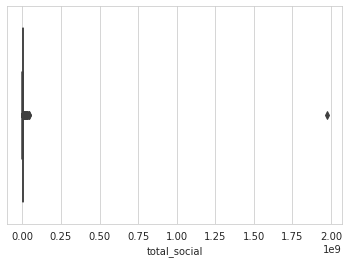

In [125]:
#graphical Univariante Analysis
import seaborn as sns
#sns.set_style("dark")



sns.set_style("whitegrid")
ax = sns.boxplot(x="total_social", data=df_new)
#df2.boxplot(column='Avg RTT DL (ms)')
plt.show()

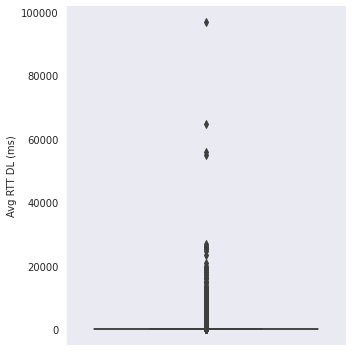

In [69]:
#graphical Univariante Analysis
import seaborn as sns
sns.set_style("dark")
sns.catplot(y='Avg RTT DL (ms)',data=df2,kind='box')

#df2.boxplot(column='Avg RTT DL (ms)')
plt.show()


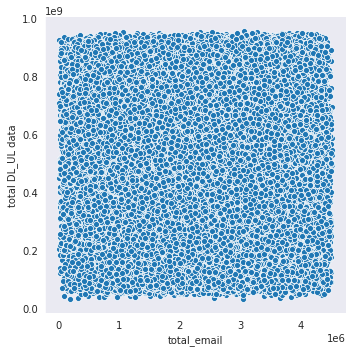

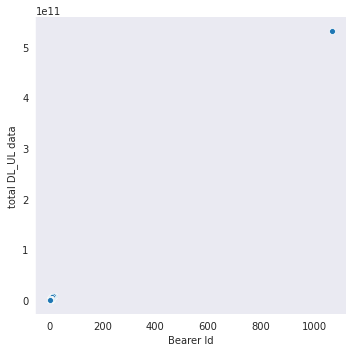

In [121]:
import seaborn as sns
sns.relplot(x='total_email',y='total DL_UL data', data=df2, kind="scatter")
sns.relplot(x='Bearer Id',y='total DL_UL data', data=df_new, kind="scatter")

plt.show()